<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Architectural%20Basics/DNN_All_Iterations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Architectural Basics**
##**Building a deep Neural network**

In this notebook, let's see how to build a neural network from scratch for MNIST image classification and how we can tune our architecture to optimize our network better step by step.  



**Import Libraries and Modules**

In [1]:
# https://keras.io/
# Importing Keras library
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
# Importing Keras classes used for building CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# Importing Keras Inbuilt dataset
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


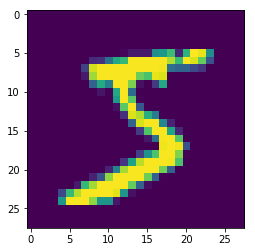

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**One Hot Encoding**



In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#**Iteration 1**
##**How we define a vanila neural network for our classification problem**


*   We will start building our network by deciding how many convolution blocks we need based on our input image size and the size of the object we are trying to predict in the image
*   And we will decide where we will place our transition blocks (Max pooling and 1x1 block) in our architecture
*   We will decide the number of kernels used 



In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(Convolution2D(32, (3, 3), activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, (1, 1), activation='relu')) # 11

model.add(Convolution2D(16, (3, 3), activation='relu')) # 9
model.add(Convolution2D(16, (3, 3), activation='relu')) # 7
model.add(Convolution2D(16, (3, 3), activation='relu'))#5

model.add(Convolution2D(16, 1, activation='relu')) #5
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))


W0812 06:27:06.444797 140382276740992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 06:27:06.483392 140382276740992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 06:27:06.490681 140382276740992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 06:27:06.547657 140382276740992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 11, 11, 16)        528       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 7, 7, 16)          2320      
__________

In [53]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=1000, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Epoch 1/30
60000/60000 [==============================] - 6s 92us/step - loss: 1.1687 - acc: 0.6144
Epoch 2/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.2936 - acc: 0.9111
Epoch 3/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.1828 - acc: 0.9458
Epoch 4/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.1351 - acc: 0.9598
Epoch 5/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.1067 - acc: 0.9683
Epoch 6/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0933 - acc: 0.9722
Epoch 7/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.0844 - acc: 0.9746
Epoch 8/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0716 - acc: 0.9779
Epoch 9/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.0659 - acc: 0.9800
Epoch 10/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0657 - acc: 0.9800

#**Iteration 2**
##**Improvements**

*   Batch Normalization
*   


In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, (3, 3), activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, (1, 1), activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu')) # 7
model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu')) # 5
model.add(BatchNormalization())

model.add(Convolution2D(16, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

In [46]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/10
60000/60000 [==============================] - 41s 688us/step - loss: 0.1639 - acc: 0.9490
Epoch 2/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0567 - acc: 0.9822
Epoch 3/10
60000/60000 [==============================] - 39s 654us/step - loss: 0.0442 - acc: 0.9855
Epoch 4/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.0352 - acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0316 - acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 40s 659us/step - loss: 0.0267 - acc: 0.9915
Epoch 7/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.0245 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 39s 650us/step - loss: 0.0205 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 39s 646us/step - loss: 0.0202 - acc: 0.9935
Epoch 10/10
60000/60000 [==============================] - 39s 645us/step - loss: 

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [48]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.0174 - acc: 0.9946
Epoch 2/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.0151 - acc: 0.9950
Epoch 3/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.0125 - acc: 0.9960
Epoch 4/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.0136 - acc: 0.9954
Epoch 5/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.0116 - acc: 0.9960
Epoch 6/10
60000/60000 [==============================] - 39s 654us/step - loss: 0.0108 - acc: 0.9966
Epoch 7/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.0112 - acc: 0.9961
Epoch 8/10
60000/60000 [==============================] - 39s 647us/step - loss: 0.0106 - acc: 0.9968
Epoch 9/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0087 - acc: 0.9969
Epoch 10/10
60000/60000 [==============================] - 39s 653us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [50]:
print(score)

[0.027626057021454473, 0.9931]


**Observations:**


1.   Adding Batch Normalization increases the accuracy meanwhile it increases the epoch time
2.   But the gap between the test accuracy(99.31) and train accuracy(99.72) is more



#**Iteration 3**
##**Improvements**

*  Adding Dropout


In [58]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, activation='relu')) #7

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-pac

In [59]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_24 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/30
60000/60000 [==============================] - 14s 231us/step - loss: 0.2591 - acc: 0.9165
Epoch 2/30
60000/60000 [==============================] - 11s 178us/step - loss: 0.0619 - acc: 0.9808
Epoch 3/30
60000/60000 [==============================] - 11s 178us/step - loss: 0.0454 - acc: 0.9857
Epoch 4/30
60000/60000 [==============================] - 11s 177us/step - loss: 0.0380 - acc: 0.9879
Epoch 5/30
60000/60000 [==============================] - 11s 178us/step - loss: 0.0326 - acc: 0.9896
Epoch 6/30
60000/60000 [==============================] - 11s 178us/step - loss: 0.0298 - acc: 0.9904
Epoch 7/30
60000/60000 [==============================] - 11s 178us/step - loss: 0.0271 - acc: 0.9911
Epoch 8/30
60000/60000 [==============================] - 11s 179us/step - loss: 0.0245 - acc: 0.9918
Epoch 9/30
60000/60000 [==============================] - 11s 177us/step - loss: 0.0235 - acc: 0.9924
Epoch 10/30
60000/60000 [==============================] - 11s 178us/step - loss: 

In [0]:
y_pred = model.predict(X_test)

In [61]:
print(y_pred[:9])
print(y_test[:9])

[[8.42954533e-18 7.42967916e-13 3.93015620e-11 2.77046969e-10
  3.31045390e-17 7.26973549e-13 4.21972502e-22 1.00000000e+00
  7.49625641e-16 4.26016972e-10]
 [6.95275337e-10 1.34179299e-06 9.99998689e-01 8.98284849e-11
  2.39147792e-17 1.31511474e-16 8.07810589e-12 3.99726693e-12
  5.70209418e-12 1.66935043e-15]
 [1.16153574e-13 9.99999881e-01 5.09166098e-10 1.38472929e-14
  7.02593894e-09 8.05170652e-11 8.83997153e-10 1.04587841e-07
  7.09176884e-11 2.89715786e-11]
 [9.99999762e-01 1.18799371e-11 1.02366587e-10 1.63240054e-14
  1.78417576e-11 8.60288056e-12 1.94128489e-07 4.62833416e-09
  3.64617503e-10 8.93620955e-10]
 [2.78256456e-14 1.91197214e-09 8.72733824e-14 5.40253578e-19
  9.99999881e-01 3.72571169e-15 5.55635572e-12 1.92694949e-09
  1.80433441e-13 9.89219160e-08]
 [3.52085250e-13 9.99998927e-01 6.74169875e-09 5.49710288e-14
  1.12558389e-08 7.50928972e-11 4.69524246e-11 1.06154198e-06
  6.31604283e-11 1.30246347e-09]
 [7.43404729e-20 5.27391153e-09 5.74158397e-13 6.97051110e

**Iteration 4**

In [62]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(16, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))

model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_28 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_5 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_29 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 24, 24, 10)        170       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
#def scheduler(epoch, lr):
#  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
#, callbacks=[LearningRateScheduler(scheduler, verbose=1)]

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 16s 274us/step - loss: 0.2303 - acc: 0.9271 - val_loss: 0.1121 - val_acc: 0.9661
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 189us/step - loss: 0.0663 - acc: 0.9790 - val_loss: 0.0782 - val_acc: 0.9764
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 187us/step - loss: 0.0530 - acc: 0.9837 - val_loss: 0.0398 - val_acc: 0.9883
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 11s 186us/step - loss: 0.0452 - acc: 0.9860 - val_loss: 0.0336 - val_acc: 0.9890
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()